In [ ]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import cauchy
import scipy.stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import confint_proportions_2indep
import statsmodels.stats.api as sms
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read csv file
# AL = pd.read_csv('August 2018 Nationwide.2.csv')
AL = pd.read_csv('/content/drive/MyDrive/MSAAI - 501 Introduction to AI/Team 2 AAI 501/August 2018 Nationwide.csv')

In [ ]:
# top records of the dataset
AL.head()

,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,...,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 28
0,2018-08-01,19805,N956AN,1587,12478,1247805,31703,JFK,14107,1410702,...,0.0,NaN,342.0,377.0,9.0,0.0,35.0,0.0,0.0,NaN
1,2018-08-01,19805,N973AN,1588,14107,1410702,30466,PHX,11618,1161802,...,0.0,NaN,285.0,309.0,0.0,0.0,53.0,0.0,0.0,NaN
2,2018-08-01,19805,N9006,1590,11042,1104205,30647,CLE,11298,1129806,...,0.0,NaN,176.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-08-01,19805,N870NN,1591,14843,1484306,34819,SJU,11298,1129806,...,0.0,NaN,304.0,303.0,43.0,0.0,0.0,0.0,0.0,NaN
4,2018-08-01,19805,N9023N,1593,10423,1042302,30423,AUS,13303,1330303,...,0.0,NaN,173.0,175.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# checking for number of columns
AL.columns

Index(['FL_DATE', 'OP_CARRIER_AIRLINE_ID', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DELAY_NEW', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'CANCELLED',
       'CANCELLATION_CODE', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'Unnamed: 28'],
      dtype='object')

In [ ]:
# removing unnecessary columns, including Airport IDies Origin and Dest, cancelltion and cancellation code
AL = AL.drop(['CANCELLED', 'CANCELLATION_CODE', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',\
              'ORIGIN_CITY_MARKET_ID', 'DEP_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 28', 'ARR_DELAY', 'ARR_DELAY_NEW'], axis=1)

In [ ]:
# renam the column "OP_CARRIER_AIRLINE_ID" to "Airline_Name"
AL.rename(columns={"TAIL_NUM":"Airline_Name", "DEP_DELAY_NEW": "DELAY"}, inplace=True)

In [ ]:
# confirm the change
AL.columns

Index(['FL_DATE', 'OP_CARRIER_AIRLINE_ID', 'Airline_Name', 'OP_CARRIER_FL_NUM',
       'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DELAY', 'ARR_TIME',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME'],
      dtype='object')

In [ ]:
# to check for the missing value
AL.isnull().sum()

FL_DATE                      0
OP_CARRIER_AIRLINE_ID        0
Airline_Name              1903
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 13563
DELAY                    14199
ARR_TIME                 14468
CRS_ELAPSED_TIME             0
ACTUAL_ELAPSED_TIME      16514
dtype: int64

In [ ]:
# Remove Any Rows Containing Nulls
AL.dropna(inplace=True)

In [ ]:
# to check for the missing value
AL.isnull().sum()

FL_DATE                  0
OP_CARRIER_AIRLINE_ID    0
Airline_Name             0
OP_CARRIER_FL_NUM        0
ORIGIN                   0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME                 0
DELAY                    0
ARR_TIME                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME      0
dtype: int64

In [ ]:
len(AL)

684260

In [ ]:
AL['DELAY'] = AL['DELAY'].astype('bool')

In [ ]:
# check for information concerning dataset
AL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684260 entries, 0 to 701351
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FL_DATE                684260 non-null  object 
 1   OP_CARRIER_AIRLINE_ID  684260 non-null  int64  
 2   Airline_Name           684260 non-null  object 
 3   OP_CARRIER_FL_NUM      684260 non-null  int64  
 4   ORIGIN                 684260 non-null  object 
 5   DEST                   684260 non-null  object 
 6   CRS_DEP_TIME           684260 non-null  int64  
 7   DEP_TIME               684260 non-null  float64
 8   DELAY                  684260 non-null  bool   
 9   ARR_TIME               684260 non-null  float64
 10  CRS_ELAPSED_TIME       684260 non-null  float64
 11  ACTUAL_ELAPSED_TIME    684260 non-null  float64
dtypes: bool(1), float64(4), int64(3), object(4)
memory usage: 63.3+ MB


In [ ]:
AL.groupby("Airline_Name")["Airline_Name"].agg("count")

Airline_Name
215NV      81
216NV     144
217NV      66
218NV      71
219NV     111
         ... 
N998AN     93
N998AT    155
N998DL    200
N998NN     99
N999DN    193
Name: Airline_Name, Length: 5757, dtype: int64

In [ ]:
# check for the unique values in the column "Airline_Name"
AL['Airline_Name'].unique()

array(['N956AN', 'N973AN', 'N9006', ..., 'N24972', 'N217UA', 'N656NK'],
      dtype=object)

In [ ]:
# to clean the column, replace this Tail numbers with unique values (airline_name)
AL["Airline_Name"] = AL["Airline_Name"].str.replace("215NV", "Allegiant Air")
AL["Airline_Name"] = AL["Airline_Name"].str.replace("216NV", "Allegiant Air")
AL["Airline_Name"] = AL["Airline_Name"].str.replace("217NV", "Allegiant Air")
AL["Airline_Name"] = AL["Airline_Name"].str.replace("218NV", "Allegiant Air")
AL["Airline_Name"] = AL["Airline_Name"].str.replace("219NV", "Allegiant Air")
AL["Airline_Name"] = AL["Airline_Name"].str.replace("N998AN", "American Airlines")
AL["Airline_Name"] = AL["Airline_Name"].str.replace("N998AT", "Delta Air Lines")
AL["Airline_Name"] = AL["Airline_Name"].str.replace("N998DL", "Delta Air Lines")
AL["Airline_Name"] = AL["Airline_Name"].str.replace("N998NN", "American Airlines")
AL["Airline_Name"] = AL["Airline_Name"].str.replace("N999DN", "Delta Air Lines")

In [ ]:
# to confirm the change- trying to get full list of unique items!(any idea?!)
UI = AL["Airline_Name"].unique()
UI

array(['N956AN', 'N973AN', 'N9006', ..., 'N24972', 'N217UA', 'N656NK'],
      dtype=object)

<Axes: >

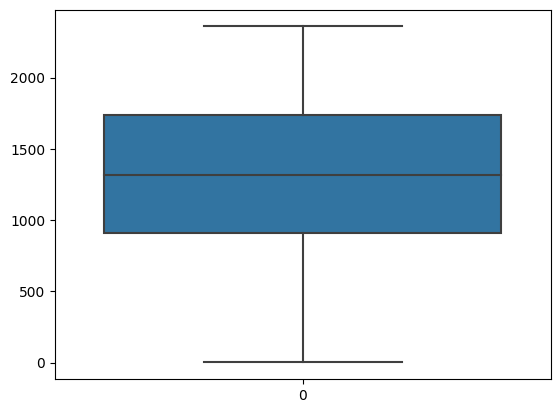

In [ ]:
# checking for outliers in the dataset
sns.boxplot(AL["CRS_DEP_TIME"])

<Axes: >

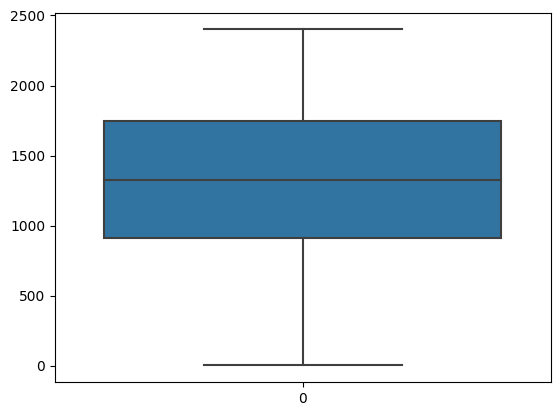

In [ ]:
sns.boxplot(AL["DEP_TIME"])

In [ ]:
# sns.boxplot(AL["DEP_DELAY"])

In [ ]:
# sns.boxplot(AL["DEP_DELAY_NEW"])

In [ ]:
# sns.boxplot(AL["ARR_TIME"])

In [ ]:
# sns.boxplot(AL["ARR_DELAY"])

In [ ]:
# sns.boxplot(AL["ARR_DELAY_NEW"])

In [ ]:
# sns.boxplot(AL["CANCELLED"])

<Axes: >

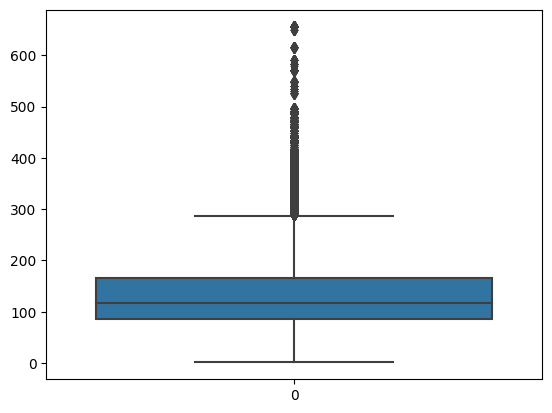

In [ ]:
sns.boxplot(AL["CRS_ELAPSED_TIME"])

<Axes: >

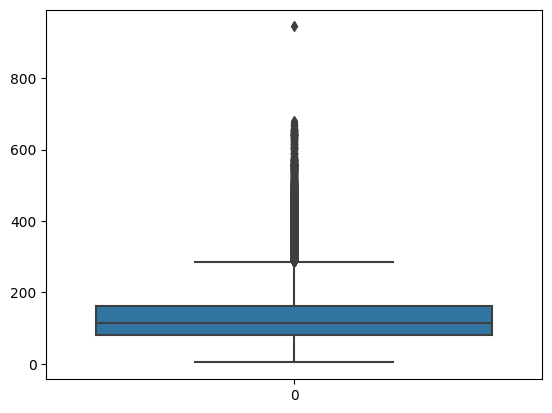

In [ ]:
sns.boxplot(AL["ACTUAL_ELAPSED_TIME"])

In [ ]:
# sns.boxplot(AL["CARRIER_DELAY"])

In [ ]:
# sns.boxplot(AL["WEATHER_DELAY"])

In [ ]:
# sns.boxplot(AL["NAS_DELAY"])

In [ ]:
# sns.boxplot(AL["SECURITY_DELAY"])

In [ ]:
# sns.boxplot(AL["LATE_AIRCRAFT_DELAY"])

In [ ]:
# chechink for duplicate values
AL.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
701347    False
701348    False
701349    False
701350    False
701351    False
Length: 684260, dtype: bool

In [ ]:
# saving the new dataset into a csv file
AL.to_csv("cleaned_data2AL.csv")

In [ ]:
# removing unnecessary columns, including Airport IDies Origin and Dest, cancelltion and cancellation code
# AL = AL.drop(['CANCELLED', 'CANCELLATION_CODE', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',\
              # 'ORIGIN_CITY_MARKET_ID', 'DEP_DELAY', 'DEP_DELAY_NEW', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unamed: 28', 'ARR_DELAY', 'ARR_DELAY_NEW'], axis=1)

# print the remaining columns
print(AL)

           FL_DATE  OP_CARRIER_AIRLINE_ID Airline_Name  OP_CARRIER_FL_NUM  \
0       2018-08-01                  19805       N956AN               1587   
1       2018-08-01                  19805       N973AN               1588   
2       2018-08-01                  19805        N9006               1590   
3       2018-08-01                  19805       N870NN               1591   
4       2018-08-01                  19805       N9023N               1593   
...            ...                    ...          ...                ...   
701347  2018-08-31                  19805       N971AN               2357   
701348  2018-08-31                  19805       N936AN               2358   
701349  2018-08-31                  19805       N831AA               2360   
701350  2018-08-31                  19805       N952NN               2361   
701351  2018-08-31                  19805       N839NN               2362   

       ORIGIN DEST  CRS_DEP_TIME  DEP_TIME  DELAY  ARR_TIME  CRS_ELAPSED_TI

In [ ]:
from sklearn import preprocessing

categorical_columns = ['OP_CARRIER_AIRLINE_ID', 'Airline_Name', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST']

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in categorical columns.
for cat in categorical_columns:
  cat_le =  label_encoder.fit_transform(AL[cat])
  if 'ORIGIN' == cat:
    origin_name_mapping = dict(zip(cat_le, AL[cat]))
  elif 'DEST' == cat:
    dest_name_mapping = dict(zip(cat_le, AL[cat]))

  AL[cat] = cat_le

### Exploratory Data Analysis

In [ ]:
## Determine Correlation Between Parameters and the Categorical Target, Delay
import scipy.stats as ss
from itertools import product

categorical_columns.append('DELAY')
categorical_columns.append('FL_DATE')
AL_cat = AL[categorical_columns]
AL_cat['FL_DATE'] = label_encoder.fit_transform(AL_cat['FL_DATE'])

AL_cat.head()

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,OP_CARRIER_AIRLINE_ID,Airline_Name,OP_CARRIER_FL_NUM,ORIGIN,DEST,DELAY,FL_DATE
0,4,5444,1584,179,265,True,0
1,4,5599,1585,265,114,True,0
2,4,4850,1587,70,92,False,0
3,4,4662,1588,322,92,True,0
4,4,4880,1590,24,223,False,0


In [ ]:
## Determine All Unique Products of the Categories to Determine Number of Chi-Squared
cat_var1 = AL_cat.columns
cat_var2 = AL_cat.columns
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))
print(cat_var_prod)
print(len(cat_var_prod))

[('OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_AIRLINE_ID'), ('OP_CARRIER_AIRLINE_ID', 'Airline_Name'), ('OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM'), ('OP_CARRIER_AIRLINE_ID', 'ORIGIN'), ('OP_CARRIER_AIRLINE_ID', 'DEST'), ('OP_CARRIER_AIRLINE_ID', 'DELAY'), ('OP_CARRIER_AIRLINE_ID', 'FL_DATE'), ('Airline_Name', 'OP_CARRIER_AIRLINE_ID'), ('Airline_Name', 'Airline_Name'), ('Airline_Name', 'OP_CARRIER_FL_NUM'), ('Airline_Name', 'ORIGIN'), ('Airline_Name', 'DEST'), ('Airline_Name', 'DELAY'), ('Airline_Name', 'FL_DATE'), ('OP_CARRIER_FL_NUM', 'OP_CARRIER_AIRLINE_ID'), ('OP_CARRIER_FL_NUM', 'Airline_Name'), ('OP_CARRIER_FL_NUM', 'OP_CARRIER_FL_NUM'), ('OP_CARRIER_FL_NUM', 'ORIGIN'), ('OP_CARRIER_FL_NUM', 'DEST'), ('OP_CARRIER_FL_NUM', 'DELAY'), ('OP_CARRIER_FL_NUM', 'FL_DATE'), ('ORIGIN', 'OP_CARRIER_AIRLINE_ID'), ('ORIGIN', 'Airline_Name'), ('ORIGIN', 'OP_CARRIER_FL_NUM'), ('ORIGIN', 'ORIGIN'), ('ORIGIN', 'DEST'), ('ORIGIN', 'DELAY'), ('ORIGIN', 'FL_DATE'), ('DEST', 'OP_CARRIER_AIRLINE_ID'), ('DE

In [ ]:
## Run Chi-Sqaured
result = []
for prod in cat_var_prod:
  if prod[0] != prod[1]: # Ignore Same Pairing Product
    result.append((prod[0],prod[1],list(ss.chi2_contingency(pd.crosstab(AL_cat[prod[0]], AL_cat[prod[1]])))[1]))

print(result)

[('OP_CARRIER_AIRLINE_ID', 'Airline_Name', 0.0), ('OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM', 0.0), ('OP_CARRIER_AIRLINE_ID', 'ORIGIN', 0.0), ('OP_CARRIER_AIRLINE_ID', 'DEST', 0.0), ('OP_CARRIER_AIRLINE_ID', 'DELAY', 0.0), ('OP_CARRIER_AIRLINE_ID', 'FL_DATE', 8.0084314112499e-178), ('Airline_Name', 'OP_CARRIER_AIRLINE_ID', 0.0), ('Airline_Name', 'OP_CARRIER_FL_NUM', 0.0), ('Airline_Name', 'ORIGIN', 0.0), ('Airline_Name', 'DEST', 0.0), ('Airline_Name', 'DELAY', 0.0), ('Airline_Name', 'FL_DATE', 1.0), ('OP_CARRIER_FL_NUM', 'OP_CARRIER_AIRLINE_ID', 0.0), ('OP_CARRIER_FL_NUM', 'Airline_Name', 0.0), ('OP_CARRIER_FL_NUM', 'ORIGIN', 0.0), ('OP_CARRIER_FL_NUM', 'DEST', 0.0), ('OP_CARRIER_FL_NUM', 'DELAY', 0.0), ('OP_CARRIER_FL_NUM', 'FL_DATE', 1.0), ('ORIGIN', 'OP_CARRIER_AIRLINE_ID', 0.0), ('ORIGIN', 'Airline_Name', 0.0), ('ORIGIN', 'OP_CARRIER_FL_NUM', 0.0), ('ORIGIN', 'DEST', 0.0), ('ORIGIN', 'DELAY', 0.0), ('ORIGIN', 'FL_DATE', 1.0), ('DEST', 'OP_CARRIER_AIRLINE_ID', 0.0), ('DEST', 'Airl

In [ ]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output.pivot(index='var1', columns='var2', values='coeff')

var2,Airline_Name,DELAY,DEST,FL_DATE,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN
var1,,,,,,,
Airline_Name,NaN,0.0,0.0,1.000000e+00,0.000000e+00,0.0,0.0
DELAY,0.0,NaN,0.0,0.000000e+00,0.000000e+00,0.0,0.0
DEST,0.0,0.0,NaN,1.000000e+00,0.000000e+00,0.0,0.0
FL_DATE,1.0,0.0,1.0,NaN,8.008431e-178,1.0,1.0
OP_CARRIER_AIRLINE_ID,0.0,0.0,0.0,8.008431e-178,NaN,0.0,0.0
OP_CARRIER_FL_NUM,0.0,0.0,0.0,1.000000e+00,0.000000e+00,NaN,0.0
ORIGIN,0.0,0.0,0.0,1.000000e+00,0.000000e+00,0.0,NaN


In [ ]:
## Determine Correlation Between Parameters and the Categorical Target, Delay
import scipy.stats as ss
from itertools import product

cat_continous_columns = ['CRS_DEP_TIME', 'DEP_TIME', 'DELAY', 'ARR_TIME', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME']
AL_con_cat = AL[cat_continous_columns]
print(AL_con_cat.head())

con_var1 = ['CRS_DEP_TIME', 'DEP_TIME', 'ARR_TIME', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME']
cat_var1 = ['DELAY']
cat_con_prod = list(product(con_var1,cat_var1, repeat = 1))
print(cat_con_prod)
print(len(cat_con_prod))

   CRS_DEP_TIME  DEP_TIME  DELAY  ARR_TIME  CRS_ELAPSED_TIME  \
0          1640    1649.0   True    2006.0             342.0   
1          1512    1541.0   True    2350.0             285.0   
2           744     741.0  False     938.0             176.0   
3           900     944.0   True    1347.0             304.0   
4           600     556.0  False     951.0             173.0   

   ACTUAL_ELAPSED_TIME  
0                377.0  
1                309.0  
2                177.0  
3                303.0  
4                175.0  
[('CRS_DEP_TIME', 'DELAY'), ('DEP_TIME', 'DELAY'), ('ARR_TIME', 'DELAY'), ('CRS_ELAPSED_TIME', 'DELAY'), ('ACTUAL_ELAPSED_TIME', 'DELAY')]
5


In [ ]:
## Find Correlation Between Categorical (Delay) and Continous Variables
result = []
for prod in cat_con_prod:
  result.append((prod[0],prod[1], AL_con_cat[prod[0]].corr(AL_con_cat[prod[1]])))

print(result)

[('CRS_DEP_TIME', 'DELAY', 0.2236207231148967), ('DEP_TIME', 'DELAY', 0.25931026809837837), ('ARR_TIME', 'DELAY', 0.14345294761273386), ('CRS_ELAPSED_TIME', 'DELAY', 0.0689241397249276), ('ACTUAL_ELAPSED_TIME', 'DELAY', 0.07509738742446118)]


In [ ]:
corr_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
corr_output.pivot(index='var1', columns='var2', values='coeff')

var2,DELAY
var1,
ACTUAL_ELAPSED_TIME,0.075097
ARR_TIME,0.143453
CRS_DEP_TIME,0.223621
CRS_ELAPSED_TIME,0.068924
DEP_TIME,0.259310


In [ ]:
## Adding Categorical Column Day of the Week
AL['Day_of_Week'] = pd.to_datetime(AL['FL_DATE']).dt.day_name()
print(AL.head())

## Label Encode
AL['Day_of_Week']= label_encoder.fit_transform(AL['Day_of_Week'])

print(AL.head())

      FL_DATE  OP_CARRIER_AIRLINE_ID  Airline_Name  OP_CARRIER_FL_NUM  ORIGIN  \
0  2018-08-01                      4          5444               1584     179   
1  2018-08-01                      4          5599               1585     265   
2  2018-08-01                      4          4850               1587      70   
3  2018-08-01                      4          4662               1588     322   
4  2018-08-01                      4          4880               1590      24   

   DEST  CRS_DEP_TIME  DEP_TIME  DELAY  ARR_TIME  CRS_ELAPSED_TIME  \
0   265          1640    1649.0   True    2006.0             342.0   
1   114          1512    1541.0   True    2350.0             285.0   
2    92           744     741.0  False     938.0             176.0   
3    92           900     944.0   True    1347.0             304.0   
4   223           600     556.0  False     951.0             173.0   

   ACTUAL_ELAPSED_TIME Day_of_Week  
0                377.0   Wednesday  
1                3

In [ ]:
# Preform Chi Squared on New Categorical Variable, Day of Week, with Delay
cat_var_1 = ['Day_of_Week']
cat_var_2 = ['DELAY']
result = list()
result.append((cat_var_1[0],cat_var_2[0],list(ss.chi2_contingency(pd.crosstab(AL[cat_var_1[0]], AL[cat_var_2[0]])))[1]))

corr_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
corr_output.pivot(index='var1', columns='var2', values='coeff')


var2,DELAY
var1,
Day_of_Week,5.772988e-81


In [ ]:
## Add Weather Parameters and Check Correlation Between Them and Delay
!pip install airportsdata
!pip install meteostat
import airportsdata
from meteostat import Point, Daily
import datetime

airports = airportsdata.load('IATA')

def retrieve_weather_data(airport_code, date):
  date = datetime.datetime.strptime(date, '%Y-%m-%d')

  try:
      airport_stats = airports[airport_code]
  except KeyError:
    return None

  airport_lat = airport_stats['lat']
  airport_lon = airport_stats['lon']

  # Create Point for Airport
  airport_point = Point(airport_lat, airport_lon)

  # Get daily data for 2018
  data_airport = Daily(airport_point, date, date)
  data_airport = data_airport.fetch().reset_index()

  return data_airport

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## Create Lookup Dictionary
unique_dates = AL['FL_DATE'].unique()

date_airport_dict = dict()

for date in unique_dates:
  origin_dest = AL.loc[AL['FL_DATE'] == date, ['ORIGIN', 'DEST']]

  origin_airports = list()
  for origin in origin_dest['ORIGIN']:
    origin_airports.append(origin_name_mapping[origin])

  dest_airports = list()
  for dest in origin_dest['DEST']:
    dest_airports.append(dest_name_mapping[dest])
  unique_airports = list(set(origin_airports + dest_airports))

  date_airport_dict[date] = {}
  for airport_IATA in unique_airports:
    date_airport_dict[date][airport_IATA] = {}

    weather_data = retrieve_weather_data(airport_IATA, date)
    try:
      date_airport_dict[date][airport_IATA]['TAVG'] = weather_data.iloc[0]['tavg']
      date_airport_dict[date][airport_IATA]['SNOW'] = weather_data.iloc[0]['snow']
      date_airport_dict[date][airport_IATA]['PRCP'] = weather_data.iloc[0]['prcp']
      date_airport_dict[date][airport_IATA]['WSPD'] = weather_data.iloc[0]['wspd']
      date_airport_dict[date][airport_IATA]['PRES'] = weather_data.iloc[0]['pres']
    except:
      date_airport_dict[date][airport_IATA]['TAVG'] = None
      date_airport_dict[date][airport_IATA]['SNOW'] = None
      date_airport_dict[date][airport_IATA]['PRCP'] = None
      date_airport_dict[date][airport_IATA]['WSPD'] = None
      date_airport_dict[date][airport_IATA]['PRES'] = None

In [ ]:
## Creation of the Weather Lists to Be Added to the DataFrame
origin_temp = list()
origin_wspd = list()
origin_snow = list()
origin_prcp = list()
origin_pres = list()

dest_temp = list()
dest_wspd = list()
dest_snow = list()
dest_prcp = list()
dest_pres = list()

for date, origin, dest in zip(AL['FL_DATE'], AL['ORIGIN'], AL['DEST']):
  origin_name = origin_name_mapping[origin]
  dest_name = dest_name_mapping[dest]

  ## Lookup the Date, Origin and Destination in the Previously Created Dictionary and Add the Appropriate Information to Their Respective Lists
  date_dict_origin = date_airport_dict[date][origin_name]
  date_dict_dest = date_airport_dict[date][dest_name]

  origin_temp.append(date_dict_origin['TAVG'])
  origin_wspd.append(date_dict_origin['WSPD'])
  origin_snow.append(date_dict_origin['SNOW'])
  origin_prcp.append(date_dict_origin['PRCP'])
  origin_pres.append(date_dict_origin['PRES'])

  dest_temp.append(date_dict_dest['TAVG'])
  dest_wspd.append(date_dict_dest['WSPD'])
  dest_snow.append(date_dict_dest['SNOW'])
  dest_prcp.append(date_dict_dest['PRCP'])
  dest_pres.append(date_dict_dest['PRES'])

AL['ORIGIN_TAVG'] = origin_temp
AL['ORIGIN_WSPD'] = origin_wspd
AL['ORIGIN_SNOW'] = origin_snow
AL['ORIGIN_PRCP'] = origin_prcp
AL['ORIGIN_PRES'] = origin_pres

AL['DEST_TAVG'] = dest_temp
AL['DEST_WSPD'] = dest_wspd
AL['DEST_SNOW'] = dest_snow
AL['DEST_PRCP'] = dest_prcp
AL['DEST_PRES'] = dest_pres

In [ ]:
print(AL.head())
## Check for Nulls
print(AL.isnull().sum())

## Drop Nulls
AL.dropna(inplace=True)

## Confirm Nulls Were Dropped
print(AL.isnull().sum())

      FL_DATE  OP_CARRIER_AIRLINE_ID  Airline_Name  OP_CARRIER_FL_NUM  ORIGIN  \
0  2018-08-01                      4          5444               1584     179   
1  2018-08-01                      4          5599               1585     265   
2  2018-08-01                      4          4850               1587      70   
3  2018-08-01                      4          4662               1588     322   
4  2018-08-01                      4          4880               1590      24   

   DEST  CRS_DEP_TIME  DEP_TIME  DELAY  ARR_TIME  ...  ORIGIN_TAVG  \
0   265          1640    1649.0   True    2006.0  ...         25.4   
1   114          1512    1541.0   True    2350.0  ...         37.5   
2    92           744     741.0  False     938.0  ...         22.9   
3    92           900     944.0   True    1347.0  ...         27.7   
4   223           600     556.0  False     951.0  ...         28.9   

   ORIGIN_WSPD  ORIGIN_SNOW  ORIGIN_PRCP  ORIGIN_PRES  DEST_TAVG  DEST_WSPD  \
0         24.

In [ ]:
## Determine Correlation Between Parameters and the Categorical Target, Delay
import scipy.stats as ss
from itertools import product

cat_continous_columns = ['ORIGIN_TAVG', 'ORIGIN_WSPD', 'ORIGIN_SNOW', 'ORIGIN_PRCP', 'ORIGIN_PRES', 'DEST_TAVG', 'DEST_WSPD', 'DEST_SNOW', 'DEST_PRCP', 'DEST_PRES', 'DELAY']
AL_con_cat = AL[cat_continous_columns]
print(AL_con_cat.head())

con_var1 = ['ORIGIN_TAVG', 'ORIGIN_WSPD', 'ORIGIN_SNOW', 'ORIGIN_PRCP', 'ORIGIN_PRES', 'DEST_TAVG', 'DEST_WSPD', 'DEST_SNOW', 'DEST_PRCP', 'DEST_PRES',]
cat_var1 = ['DELAY']
cat_con_prod = list(product(con_var1,cat_var1, repeat = 1))
print(cat_con_prod)
print(len(cat_con_prod))

   ORIGIN_TAVG  ORIGIN_WSPD  ORIGIN_SNOW  ORIGIN_PRCP  ORIGIN_PRES  DEST_TAVG  \
0         25.4         24.8          0.0          0.5       1017.7       37.5   
1         37.5         10.1          0.0          0.0       1008.1       26.2   
2         22.9         14.8          0.0          0.0       1014.3       27.6   
3         27.7         16.9          0.0          4.3       1017.0       27.6   
4         28.9          9.7          0.0          0.0       1014.4       28.4   

   DEST_WSPD  DEST_SNOW  DEST_PRCP  DEST_PRES  DELAY  
0       10.1        0.0        0.0     1008.1   True  
1       19.8        0.0        2.3     1016.9   True  
2       10.1        0.0        0.0     1015.4  False  
3       10.1        0.0        0.0     1015.4   True  
4       13.7        0.0        2.8     1018.3  False  
[('ORIGIN_TAVG', 'DELAY'), ('ORIGIN_WSPD', 'DELAY'), ('ORIGIN_SNOW', 'DELAY'), ('ORIGIN_PRCP', 'DELAY'), ('ORIGIN_PRES', 'DELAY'), ('DEST_TAVG', 'DELAY'), ('DEST_WSPD', 'DELAY'), ('DE

In [ ]:
result = []
for prod in cat_con_prod:
  result.append((prod[0],prod[1], AL_con_cat[prod[0]].corr(AL_con_cat[prod[1]])))

print(result)

[('ORIGIN_TAVG', 'DELAY', 0.0019688561113175755), ('ORIGIN_WSPD', 'DELAY', 0.00196047046184753), ('ORIGIN_SNOW', 'DELAY', nan), ('ORIGIN_PRCP', 'DELAY', 0.0725389910011924), ('ORIGIN_PRES', 'DELAY', -0.03094152701535053), ('DEST_TAVG', 'DELAY', -0.003898308433448934), ('DEST_WSPD', 'DELAY', 0.009745433394093981), ('DEST_SNOW', 'DELAY', nan), ('DEST_PRCP', 'DELAY', 0.04592608550537086), ('DEST_PRES', 'DELAY', -0.02374676289319035)]


In [ ]:
corr_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
corr_output.pivot(index='var1', columns='var2', values='coeff')

var2,DELAY
var1,
DEST_PRCP,0.045926
DEST_PRES,-0.023747
DEST_SNOW,NaN
DEST_TAVG,-0.003898
DEST_WSPD,0.009745
ORIGIN_PRCP,0.072539
ORIGIN_PRES,-0.030942
ORIGIN_SNOW,NaN
ORIGIN_TAVG,0.001969


### Model Selection

In [ ]:
from sklearn import svm, tree, naive_bayes, linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
 def run_decision_tree(x_train, y_train, x_test, y_test):
  '''
  Function for Autonomous Running of a Decision Tree
  '''
 
  ## Create Decision Tree Object
  clf = tree.DecisionTreeClassifier(random_state=0)

  ## Fit clf2 with x_train_scaled and y_train_scaled
  clf.fit(x_train, y_train)

  ## Predict and Score
  predictions = clf.predict(x_test)
  score = accuracy_score(y_test, predictions)

  return score



In [ ]:
def run_random_forest(x_train, y_train, x_test, y_test):
  '''
  Function for Autonomous Running of the Random Forest Function
  '''
  ## Fitting the Model
  rf = RandomForestClassifier(n_estimators=500)
  rf.fit(x_train, y_train)

  ## Evaluating the Model
  predictions = rf.predict(x_test)
  score = accuracy_score(y_test, predictions)

  return score

In [ ]:
def run_naive_bayes(x_train, y_train, x_test, y_test):
  '''
  Function for Autonomous Running of a Naive Bayes Model
  '''

  ## Fitting the Model
  gnb = naive_bayes.GaussianNB()
  gnb.fit(x_train, y_train)

  ## Evaluating the Model
  predictions = gnb.predict(x_test)
  score = accuracy_score(y_test, predictions)

  return score

In [ ]:
def run_logistic_regression(x_train, y_train, x_test, y_test):
  '''
  Function for Autonomous Running of Logistic Regression
  '''
  ## Fitting the Model
  lr = linear_model.LogisticRegression(random_state=0)
  lr.fit(x_train, y_train)

  ## Evaluating the Model
  predictions = lr.predict(x_test)
  score = accuracy_score(y_test, predictions)

  return score

In [ ]:
# Run Models on Various Sized Training Sets

i = 10000
dt_list = []
rf_list = []
nb_list = []
lr_list = []
num_samples = []
while i <= 100000:
  ## Sample from Data Set Randomly of Size i
  AL_r = AL.sample(n=i, random_state=0)
  ## Split the Sample for Training and Testing
  x_train, x_test, y_train, y_test = train_test_split(AL_r[['OP_CARRIER_AIRLINE_ID', 'Airline_Name', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'ARR_TIME', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME']], AL_r['DELAY'], random_state=0)

  dt_acc = run_decision_tree(x_train, y_train, x_test, y_test)
  rf_acc = run_random_forest(x_train, y_train, x_test, y_test)
  nb_acc = run_naive_bayes(x_train, y_train, x_test, y_test)
  lr_acc = run_logistic_regression(x_train, y_train, x_test, y_test)
  
  dt_list.append(round(dt_acc*100, 2))
  rf_list.append(round(rf_acc*100, 2))
  nb_list.append(round(nb_acc*100, 2))
  lr_list.append(round(lr_acc*100, 2));

  num_samples.append(i)

  i += 5000

samples_dict = {'Decision Tree Accuracy':dt_list, 'Random Forest Accuracy':rf_list, 'Naive Bayes (Gaussian) Accuracy': nb_list, 'Logistic Regression': lr_list}
samples_df_inital = pd.DataFrame(data=samples_dict, index=num_samples)



STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

In [ ]:
print(samples_df_inital)

        Decision Tree Accuracy  Random Forest Accuracy  \
10000                    82.84                   78.12   
15000                    87.01                   80.45   
20000                    89.32                   82.04   
25000                    89.84                   83.47   
30000                    92.20                   84.59   
35000                    93.07                   85.36   
40000                    94.49                   86.50   
45000                    94.72                   86.41   
50000                    95.54                   86.71   
55000                    95.46                   87.13   
60000                    95.71                   87.03   
65000                    95.99                   87.69   
70000                    96.05                   87.73   
75000                    96.20                   88.05   
80000                    97.32                   88.64   
85000                    96.93                   88.37   
90000         

In [ ]:

i = 10000
dt_list = []
rf_list = []
nb_list = []
lr_list = []
num_samples = []
while i <= 100000:
  ## Sample from Data Set Randomly of Size i
  AL_r = AL.sample(n=i, random_state=0)
  ## Split the Sample for Training and Testing
  x_train, x_test, y_train, y_test = train_test_split(AL_r[['CRS_DEP_TIME', 'DEP_TIME', 'ARR_TIME', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME']], AL_r['DELAY'], random_state=0)

  dt_acc = run_decision_tree(x_train, y_train, x_test, y_test)
  rf_acc = run_random_forest(x_train, y_train, x_test, y_test)
  nb_acc = run_naive_bayes(x_train, y_train, x_test, y_test)
  lr_acc = run_logistic_regression(x_train, y_train, x_test, y_test)
  
  dt_list.append(round(dt_acc*100, 2))
  rf_list.append(round(rf_acc*100, 2))
  nb_list.append(round(nb_acc*100, 2))
  lr_list.append(round(lr_acc*100, 2));

  num_samples.append(i)

  i += 5000

samples_dict = {'Decision Tree Accuracy':dt_list, 'Random Forest Accuracy':rf_list, 'Naive Bayes (Gaussian) Accuracy': nb_list, 'Logistic Regression': lr_list}
samples_df_reduced_param = pd.DataFrame(data=samples_dict, index=num_samples)

In [ ]:
print(samples_df_reduced_param)

        Decision Tree Accuracy  Random Forest Accuracy  \
10000                    91.40                   86.64   
15000                    93.15                   88.72   
20000                    94.36                   90.28   
25000                    95.76                   91.49   
30000                    95.48                   91.76   
35000                    97.06                   92.15   
40000                    97.05                   93.24   
45000                    97.41                   93.62   
50000                    97.33                   94.10   
55000                    97.96                   94.28   
60000                    97.62                   94.38   
65000                    98.12                   94.94   
70000                    98.17                   94.91   
75000                    98.18                   94.90   
80000                    98.48                   95.46   
85000                    98.31                   95.39   
90000         

In [ ]:
## Sample from Data Set Randomly of Size i
i = 10000
dt_list = []
rf_list = []
nb_list = []
lr_list = []
num_samples = []
while i <= 100000:
  AL_r = AL.sample(n=i, random_state=0)
  ## Split the Sample for Training and Testing
  x_train, x_test, y_train, y_test = train_test_split(AL_r[['CRS_DEP_TIME', 'DEP_TIME', 'ARR_TIME', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'Day_of_Week']], AL_r['DELAY'], random_state=0)

  dt_acc = run_decision_tree(x_train, y_train, x_test, y_test)
  rf_acc = run_random_forest(x_train, y_train, x_test, y_test)
  nb_acc = run_naive_bayes(x_train, y_train, x_test, y_test)
  lr_acc = run_logistic_regression(x_train, y_train, x_test, y_test)
  
  dt_list.append(round(dt_acc*100, 2))
  rf_list.append(round(rf_acc*100, 2))
  nb_list.append(round(nb_acc*100, 2))
  lr_list.append(round(lr_acc*100, 2));

  num_samples.append(i)

  i += 5000

samples_dict = {'Decision Tree Accuracy':dt_list, 'Random Forest Accuracy':rf_list, 'Naive Bayes (Gaussian) Accuracy': nb_list, 'Logistic Regression': lr_list}
samples_df_cat_days = pd.DataFrame(data=samples_dict, index=num_samples)

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

In [ ]:
print(samples_df_cat_days)

        Decision Tree Accuracy  Random Forest Accuracy  \
10000                    91.12                   84.28   
15000                    92.53                   86.77   
20000                    94.06                   87.52   
25000                    95.62                   88.98   
30000                    95.36                   89.41   
35000                    96.95                   90.09   
40000                    96.93                   91.12   
45000                    97.12                   91.43   
50000                    97.32                   91.98   
55000                    97.82                   92.22   
60000                    97.51                   91.97   
65000                    97.96                   92.60   
70000                    98.09                   92.96   
75000                    97.98                   92.53   
80000                    98.43                   93.18   
85000                    98.26                   93.16   
90000         

In [ ]:
## Sample from Data Set Randomly of Size i
i = 10000
dt_list = []
rf_list = []
nb_list = []
lr_list = []
num_samples = []
while i <= 100000:
  AL_r = AL.sample(n=i, random_state=0)
  ## Split the Sample for Training and Testing

  x_train, x_test, y_train, y_test = train_test_split(AL_r[['CRS_DEP_TIME', 'DEP_TIME', 'ARR_TIME', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'ORIGIN_PRCP', 'DEST_PRCP']], AL_r['DELAY'], random_state=0)
  dt_acc = run_decision_tree(x_train, y_train, x_test, y_test)
  rf_acc = run_random_forest(x_train, y_train, x_test, y_test)
  nb_acc = run_naive_bayes(x_train, y_train, x_test, y_test)
  lr_acc = run_logistic_regression(x_train, y_train, x_test, y_test)
  
  dt_list.append(round(dt_acc*100, 2))
  rf_list.append(round(rf_acc*100, 2))
  nb_list.append(round(nb_acc*100, 2))
  lr_list.append(round(lr_acc*100, 2))

  num_samples.append(i)

  i += 5000


STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

In [ ]:
samples_dict = {'Decision Tree Accuracy':dt_list, 'Random Forest Accuracy':rf_list, 'Naive Bayes (Gaussian) Accuracy': nb_list, 'Logistic Regression': lr_list}
samples_df_weather = pd.DataFrame(data=samples_dict, index=num_samples)
print(samples_df_weather)

In [ ]:
i = 10000
idx = 0
while i <=100000:
  for model in samples_df_inital.columns:
    print(f'{model} w/ {i} Samples (No Additional Parameters): {samples_df_inital[model].iloc[idx]}%, {model} w/ {i} Samples (Additional Day of Week Parameter): {samples_df_cat_days[model].iloc[idx]}%, Difference: {round(samples_df_inital[model].iloc[idx] - samples_df_cat_days[model].iloc[idx], 2)}%')
  print()
  i += 5000
  idx += 1


In [ ]:
i = 10000
idx = 0
while i <=100000:
  for model in samples_df_inital.columns:
    print(f'{model} w/ {i} Samples (No Additional Parameters): {samples_df_inital[model].iloc[idx]}%, {model} w/ {i} Samples (Additional Weather Parameters): {samples_df_weather[model].iloc[idx]}%, Difference: {round(samples_df_inital[model].iloc[idx] - samples_df_weather[model].iloc[idx], 2)}%')
  print()
  i += 5000
  idx += 1

Decision Tree Accuracy w/ 10000 Samples (No Additional Parameters): 82.84%, Decision Tree Accuracy w/ 10000 Samples (Additional Weather Parameters): 89.84%, Difference: -7.0%
Random Forest Accuracy w/ 10000 Samples (No Additional Parameters): 78.12%, Random Forest Accuracy w/ 10000 Samples (Additional Weather Parameters): 81.64%, Difference: -3.52%
Naive Bayes (Gaussian) Accuracy w/ 10000 Samples (No Additional Parameters): 61.0%, Naive Bayes (Gaussian) Accuracy w/ 10000 Samples (Additional Weather Parameters): 60.92%, Difference: 0.08%
Logistic Regression w/ 10000 Samples (No Additional Parameters): 63.0%, Logistic Regression w/ 10000 Samples (Additional Weather Parameters): 63.76%, Difference: -0.76%

Decision Tree Accuracy w/ 15000 Samples (No Additional Parameters): 87.01%, Decision Tree Accuracy w/ 15000 Samples (Additional Weather Parameters): 91.68%, Difference: -4.67%
Random Forest Accuracy w/ 15000 Samples (No Additional Parameters): 80.45%, Random Forest Accuracy w/ 15000 Sam

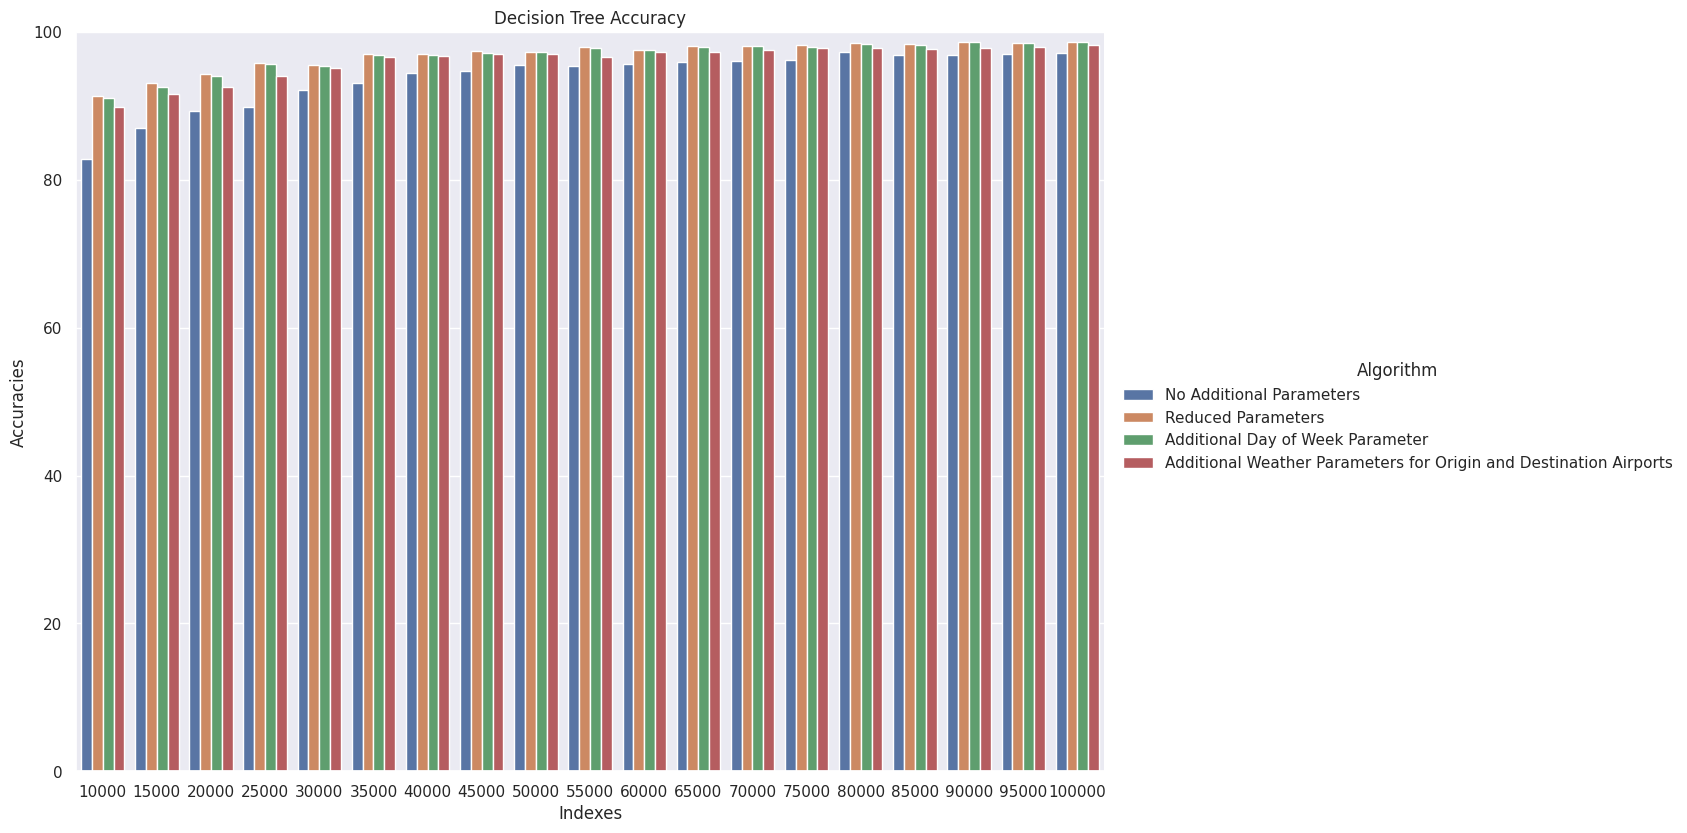

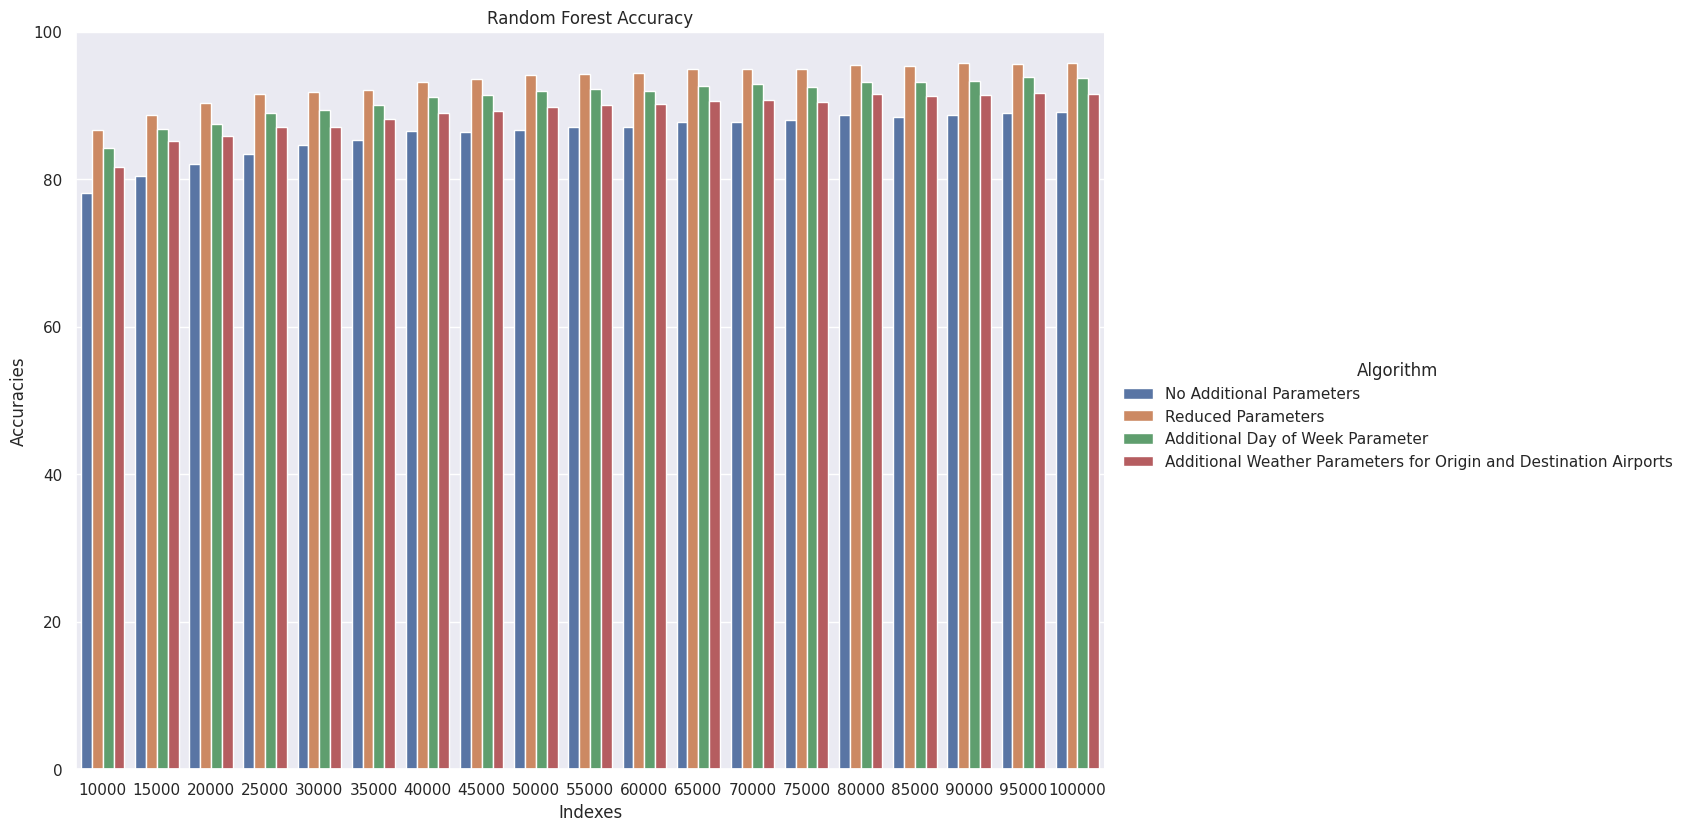

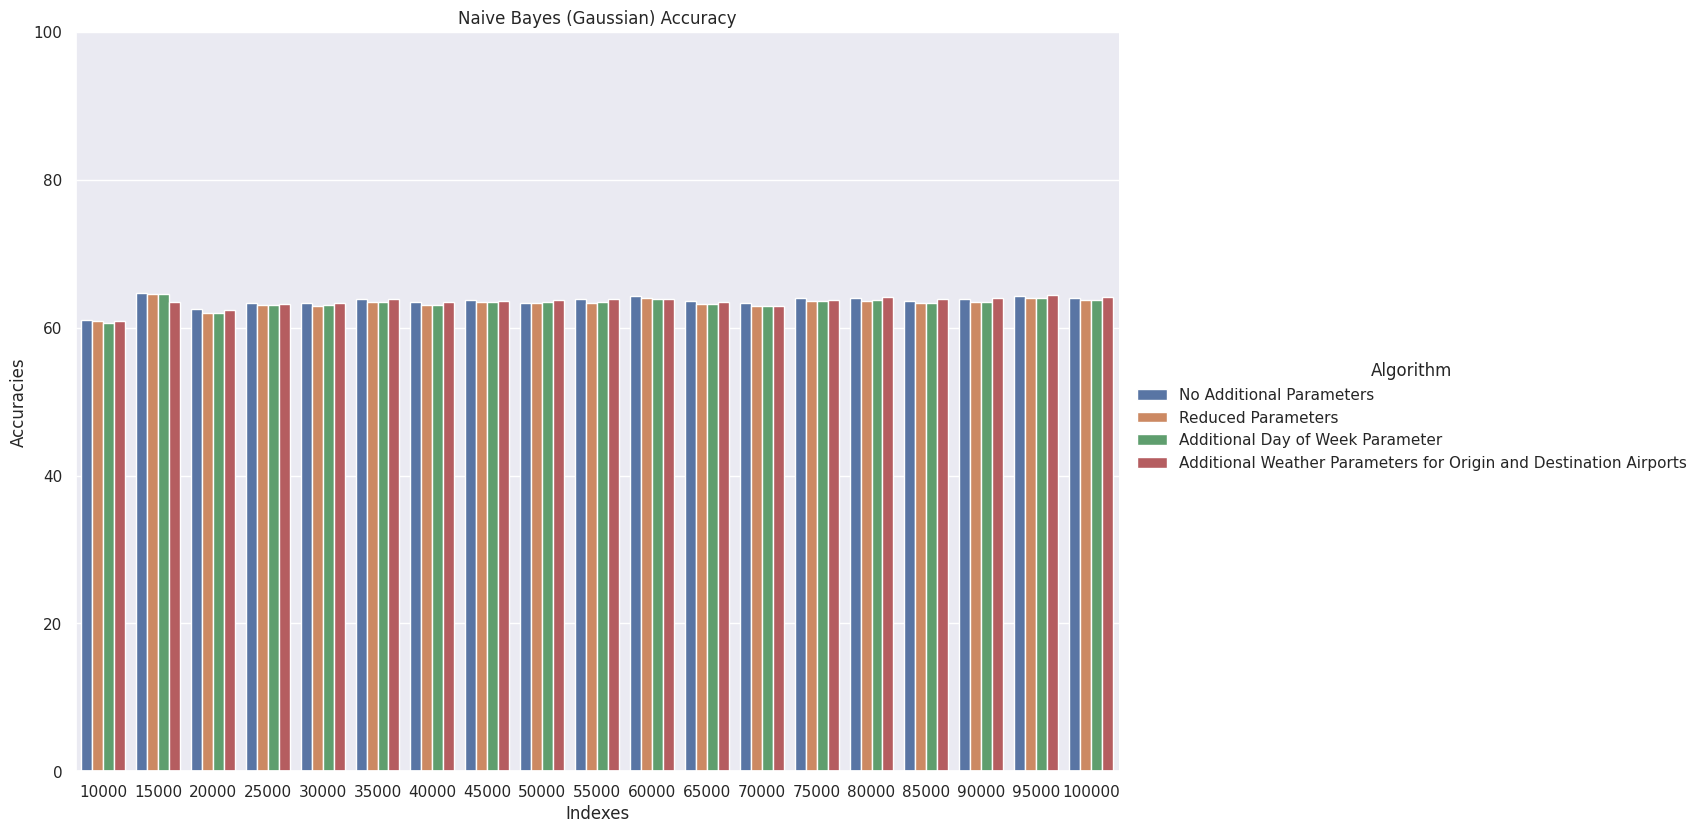

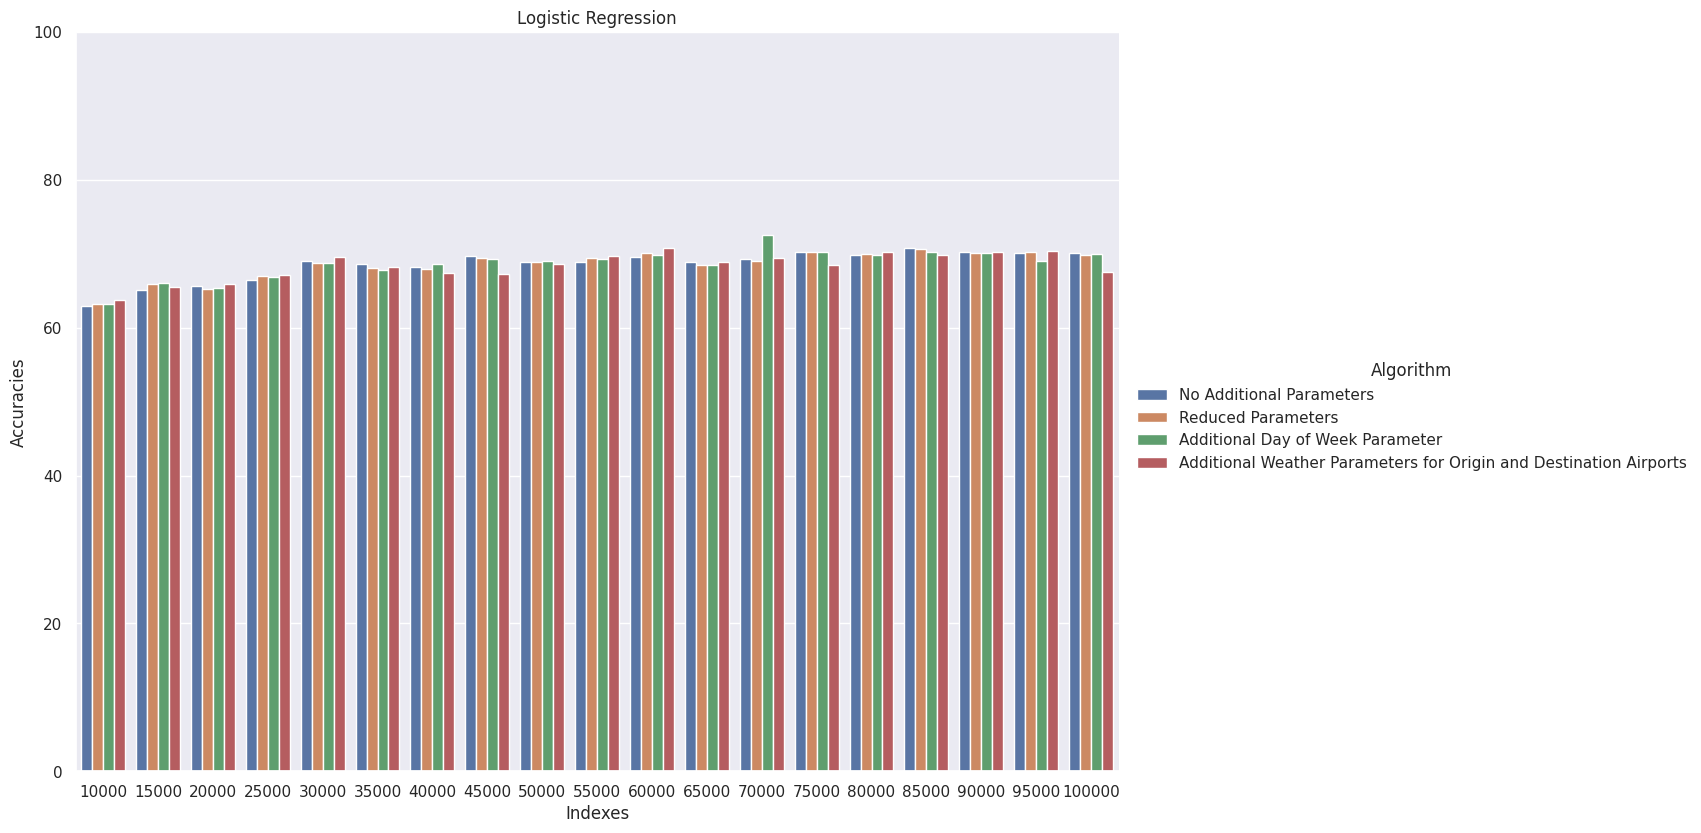

In [ ]:
## Plot Histograms for Each Model
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 20 , 20

for model in samples_df_inital.columns:

  indexes =  list(samples_df_inital.index.values) + list(samples_df_reduced_param.index.values) + list(samples_df_cat_days.index.values) + list(samples_df_weather.index.values)
  algo = ['No Additional Parameters'] * 19 + ['Reduced Parameters'] * 19 + ['Additional Day of Week Parameter'] * 19 + ['Additional Weather Parameters for Origin and Destination Airports'] * 19
  accurs = list(samples_df_inital[model]) + list(samples_df_reduced_param[model]) + list(samples_df_cat_days[model]) + list(samples_df_weather[model])

  conjoined_models = {'Indexes': indexes, 'Algorithm': algo, 'Accuracies': accurs}
  conjoined_model_df = pd.DataFrame(data=conjoined_models)
  sns.catplot(kind='bar', data=conjoined_model_df, x='Indexes', y='Accuracies', hue='Algorithm', height=8.27, aspect=11.7/8.27)

  plt.ylim(0,100)
  plt.title(model)